# Linear Regression

In [1]:
using Pkg


In [2]:
Pkg.add("CSV")#This method can be used to create a CSV file, add contents to the file, Update the File, etc

Pkg.add("DataFrames")#It provides a set of tools for working with tabular data in Julia. Its design and functionality 
#are similar to those of pandas (in Python) and data.

   Updating registry at `C:\Users\aniru\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Manifest.toml`


In [3]:
Pkg.add("Plots")# It's for having graphs in a module.

Pkg.add("Lathe")# It is an all-in-one package for predictive modeling.

# Generalized Linear Model (GLM) is a flexible generalization of ordinary linear regression that allows for response 
#variables that have error distribution models other than a normal distribution.
Pkg.add("GLM")

Pkg.add("StatsPlots")# Use for Subject To Subject plot and Population Plot.

Pkg.add("MLBase")# It provides a collection of useful tools to support machine learning programs, 
#including: Data manipulation & preprocessing. Score-based classification.
using Plots
using Lathe
using GLM
using StatsPlots
using MLBase

  Resolving package versions...
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\aniru\.julia\environments\v1.5\Manifest.toml`


In [4]:
using CSV
using DataFrames
df = DataFrame(CSV.File("Life_Expectancy.csv"))
first(df,5)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths
,String,Int64,String,Float64,Float64,Int64
1,Afghanistan,2015,Developing,65.0,263.0,62
2,Afghanistan,2014,Developing,59.9,271.0,64
3,Afghanistan,2013,Developing,59.9,268.0,66
4,Afghanistan,2012,Developing,59.5,272.0,69
5,Afghanistan,2011,Developing,59.2,275.0,71


In [5]:
println(size(df))

describe(df)

(2938, 22)


,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Country,,Afghanistan,,Zimbabwe
2,Year,2007.52,2000,2008.0,2015
3,Status,,Developed,,Developing
4,Life expectancy,69.2249,36.3,72.0,89.0
5,Adult Mortality,164.796,1.0,144.0,723.0
6,infant deaths,30.3039,0,3.0,1800
7,Alcohol,4.60286,0.01,4.16,17.87
8,percentage expenditure,738.251,0.0,64.9129,19479.9
9,Hepatitis B,80.9405,1.0,87.0,99.0


In [6]:
#Display Column Names
names(df)

22-element Array{String,1}:
 "Country"
 "Year"
 "Status"
 "Life expectancy "
 "Adult Mortality"
 "infant deaths"
 "Alcohol"
 "percentage expenditure"
 "Hepatitis B"
 "Measles "
 " BMI "
 "under-five deaths "
 "Polio"
 "Total expenditure"
 "Diphtheria "
 " HIV/AIDS"
 "GDP"
 "Population"
 " thinness  1-19 years"
 " thinness 5-9 years"
 "Income composition of resources"
 "Schooling"

# Replaceing the names having spaces with _

In [7]:
#Fix column names  by replacing " ","-","/" with "_"
colnames = Symbol[]
for i in string.(names(df))
    push!(colnames, Symbol(replace(replace(replace(strip(i), " " => "_"), "-" => "_"), "/" => "_")))
end
rename!(df, colnames);

In [8]:
names(df)

22-element Array{String,1}:
 "Country"
 "Year"
 "Status"
 "Life_expectancy"
 "Adult_Mortality"
 "infant_deaths"
 "Alcohol"
 "percentage_expenditure"
 "Hepatitis_B"
 "Measles"
 "BMI"
 "under_five_deaths"
 "Polio"
 "Total_expenditure"
 "Diphtheria"
 "HIV_AIDS"
 "GDP"
 "Population"
 "thinness__1_19_years"
 "thinness_5_9_years"
 "Income_composition_of_resources"
 "Schooling"

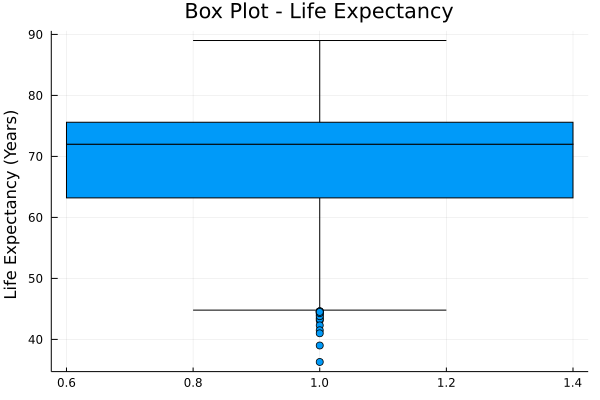

In [9]:
# Box Plot
boxplot(df.Life_expectancy, title = "Box Plot - Life Expectancy", ylabel = "Life Expectancy (Years) ", legend = false)

In [10]:
# Outkiner Removal
first_percentile = percentile(df.Life_expectancy, 25)
iqr_value = iqr(df.Life_expectancy)
df = df[df.Life_expectancy .> (first_percentile - 1.5 * iqr_value), :];

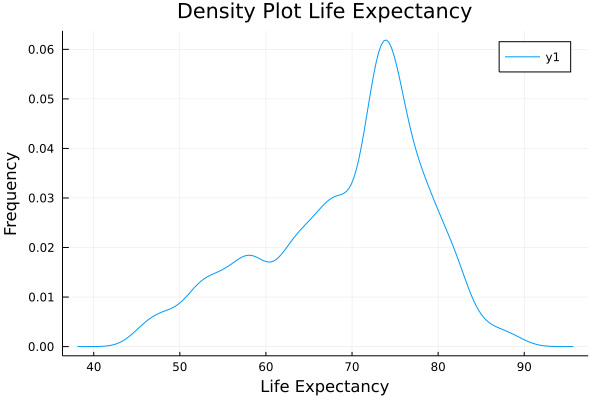

In [11]:
density(df.Life_expectancy, title = "Density Plot Life Expectancy", ylabel = "Frequency", xlabel = "Life Expectancy", legend = true)        

In [12]:
using Statistics

Correlation of Life Expextancy with Adult Mortality Rate is-0.6890364947023733




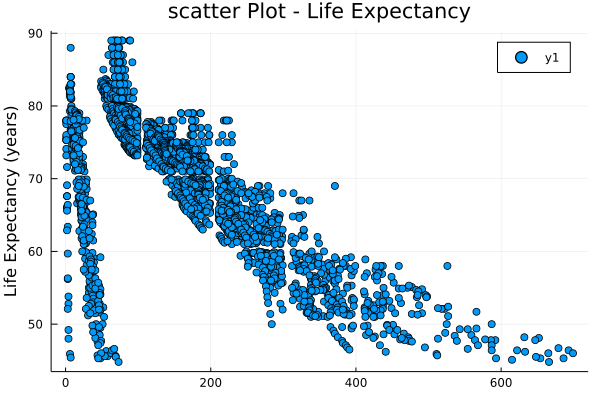

In [13]:

println("Correlation of Life Expextancy with Adult Mortality Rate is", cor(df.Adult_Mortality,df.Life_expectancy),"\n\n")
 
#Scatter plot
scatter(df.Adult_Mortality, df.Life_expectancy, title="scatter Plot - Life Expectancy", ylabel="Life Expectancy (years)", legand=false)


In [14]:
# To Remove Column From Dataframe:
df = df[:,Not(:Country)];
df = df[:,Not(:Status)]

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure
,Int64,Float64,Float64,Int64,Float64,Float64
1,2015,65.0,263.0,62,0.01,71.2796
2,2014,59.9,271.0,64,0.01,73.5236
3,2013,59.9,268.0,66,0.01,73.2192
4,2012,59.5,272.0,69,0.01,78.1842
5,2011,59.2,275.0,71,0.01,7.09711
6,2010,58.8,279.0,74,0.01,79.6794
7,2009,58.6,281.0,77,0.01,56.7622
8,2008,58.1,287.0,80,0.03,25.8739
9,2007,57.5,295.0,82,0.02,10.9102


# TRAIN TEST SPLIT

In [15]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df, .75)

(2207×20 DataFrame
  Row │ Year   Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  perce ⋯
      │ Int64  Float64          Float64          Int64          Float64  Float ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │  2015             65.0            263.0             62  0.01           ⋯
    2 │  2014             59.9            271.0             64  0.01
    3 │  2013             59.9            268.0             66  0.01
    4 │  2012             59.5            272.0             69  0.01
    5 │  2011             59.2            275.0             71  0.01           ⋯
    6 │  2010             58.8            279.0             74  0.01
    7 │  2009             58.6            281.0             77  0.01
    8 │  2008             58.1            287.0             80  0.03
    9 │  2007             57.5            295.0             82  0.02           ⋯
   10 │  2006             57.3            295.0             84  0.03
   11 │  200

# Model Building

In [16]:
fm = @formula(Life_expectancy ~ Adult_Mortality)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

Life_expectancy ~ 1 + Adult_Mortality

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)      77.9824     0.243751    319.93    <1e-99  77.5044     78.4604
Adult_Mortality  -0.0531017  0.00120114  -44.21    <1e-99  -0.0554572  -0.0507462
─────────────────────────────────────────────────────────────────────────────────

# Model Dignostics

In [17]:
# R Square Value Of The Model
r2(linearRegressor)

0.46988607477029

# Prediction

In [18]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (Compute Squared Error )
performance_testdf = DataFrame(y_actual = test[!,:Life_expectancy], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (Compute Squared Error ) 
performance_traindf = DataFrame(y_actual = train[!,:Life_expectancy], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error;


In [24]:
# MAPE Function Defination
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

In [44]:
mape(performance_testdf)

0.06895189117815818

In [45]:
mape(performance_traindf)

0.07429063952411841

In [25]:
# RMSE Function Defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end


rmse (generic function with 1 method)

In [42]:
rmse(performance_testdf)

6.463545504883864

In [43]:
rmse(performance_traindf)

6.843125576923848

In [26]:
# Test Error
println("Mean Absolute test error : ",mean(abs.(performance_testdf.error)),"\n")
println("Mean Absolute Percentage test error : ",mape(performance_testdf),"\n")
println("Root Mean Square test error : ",rmse(performance_testdf),"\n")
println("Mean Square test error : ",mean(performance_testdf.error_sq),"\n")

Mean Absolute test error : 4.51035592743502

Mean Absolute Percentage test error : 0.06895189117815818

Root Mean Square test error : 6.463545504883864

Mean Square test error : 41.77742049370441



In [27]:
# Train Error
println("Mean Absolute train error : ",mean(abs.(performance_traindf.error)),"\n")
println("Mean Absolute Percentage train error : ",mape(performance_traindf),"\n")
println("Root Mean Square train error : ",rmse(performance_traindf),"\n")
println("Mean Square train error : ",mean(performance_traindf.error_sq),"\n")

Mean Absolute train error : 4.851959713063833

Mean Absolute Percentage train error : 0.07429063952411841

Root Mean Square train error : 6.843125576923848

Mean Square train error : 46.82836766154934



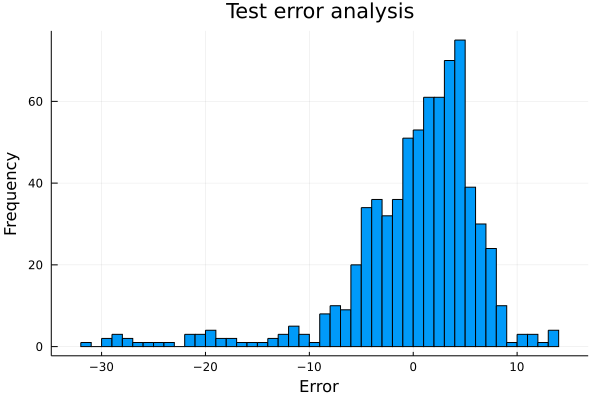

In [29]:
# Histogram Of Error For Test Data
histogram(performance_testdf.error, bins=50, title="Test error analysis", ylabel="Frequency", xlabel="Error", legend=false)

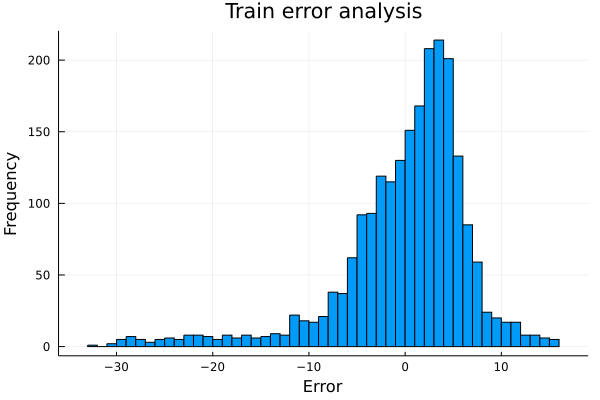

In [30]:
# Histogram Of Error For Train Data
histogram(performance_traindf.error, bins=50, title="Train error analysis", ylabel="Frequency", xlabel="Error", legend=false)

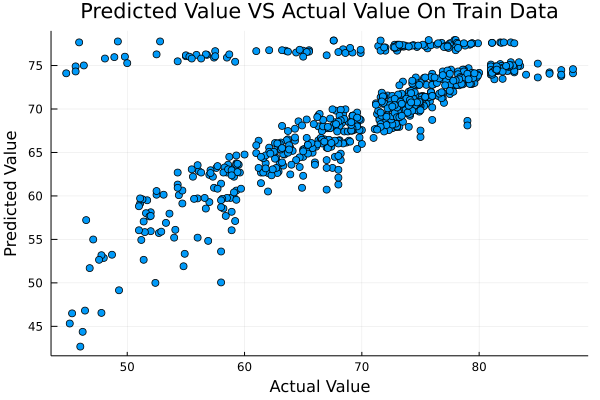

In [39]:
# Scatter Plot For Test Data
test_plot=scatter(performance_testdf[!,:y_actual], performance_testdf[!,:y_predicted], title = "Predicted Value VS Actual Value On Train Data", ylabel="Predicted Value", xlabel="Actual Value", legend=false)

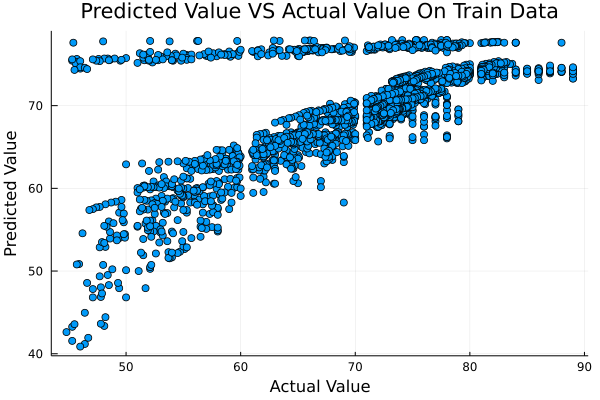

In [40]:
# Scatter Plot For Train Data
test_plot=scatter(performance_traindf[!,:y_actual], performance_traindf[!,:y_predicted], title="Predicted Value VS Actual Value On Train Data", ylabel="Predicted Value", xlabel="Actual Value", legend=false)

# Cross Validation

In [41]:
function cross_validation(train, k, fm = @formula(Life_expentency ~ Adult_Mortality))
    a = collect(Kfold(size(train)[1],k))
    for i in i:k
        row =a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end,row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Life_expectancy], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
        
        println("Mean Error For Set &i is: ", mean(abs.(performance_testdf.error)))
    end
end


cross_validation (generic function with 2 methods)